In [56]:
import pandas as pd
import seaborn as sns

In [57]:
df = pd.read_csv('data_clean/train.csv')
pd.options.display.max_columns = None
df

,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,Income,Expenditure,GiftsTransaction,TransactionDate,TransactionTime,TransactionAmount,MerchantID,TransactionType,TransactionLocation,DeviceType,Latitude,Longitude,EmailDomain,Terrorism,UserTenure,IsFraud,ExpenditureCurrency,GiftsCurrency,TransactionDatetime,TransactionCurrency
0,8765,70,37,Female,Professional,Bachelor,Widowed,3,28884.43,14610.61,1050.01,2023-03-12,12:25:57,258.14,M006,Withdrawal,Adelaide,Mobile,-31.840233,145.612793,jon44@disposable.com,False,113,1,AUD,GBP,2023-03-12 12:25:57,AUD
1,9645,3386,34,Male,Student,High School,Married,4,54919.07,39169.49,4969.71,2023-03-05,18:27:24,34.94,M002,Withdrawal,Canberra,Mobile,-37.020100,144.964600,emilyreese@gmail.com,False,104,1,AUD,GBP,2023-03-05 18:27:24,AUD
2,1145,2971,25,Male,Unemployed,Master,Married,2,74728.57,55873.76,1149.85,2023-11-10,17:16:56,323.82,M008,Purchase,Brisbane,Mobile,-31.840233,145.612793,fordevan@gmail.com,False,105,0,AUD,GBP,2023-11-10 17:16:56,AUD
3,15308,2925,25,Male,Professional,High School,Married,3,55712.62,89649.04,4335.70,2023-10-07,00:34:17,32.49,M001,Purchase,Darwin,Mobile,-37.020100,144.964600,kathleenlewis@tempmail.com,False,70,1,AED,AUD,2023-10-07 00:34:17,AED
4,14967,2339,38,Male,Professional,High School,Single,4,53004.70,43601.02,4763.48,2023-09-22,18:40:08,1140.75,M001,Withdrawal,Melbourne,Tablet,-37.020100,144.964600,kristinawhite@gmail.com,False,27,0,AED,AUD,2023-09-22 18:40:08,AED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,14541,106,47,Male,Student,Master,Married,4,74835.82,45101.32,1270.87,2023-04-26,12:28:58,477.47,M004,Payment,Brisbane,Mobile,-37.020100,144.964600,melaniereyes@gmail.com,True,67,0,AUD,GBP,2023-04-26 12:28:58,AUD
3564,12206,1668,45,Female,Unemployed,Master,Married,0,86312.26,48357.47,2009.35,2023-06-01,02:57:48,76.53,M007,Purchase,Perth,Desktop,-20.917574,142.702789,anthony35@gmail.com,False,63,1,AUD,GBP,2023-06-01 02:57:48,AUD
3565,8433,2701,30,Female,Student,High School,Single,3,50836.99,29800.75,1291.68,2023-07-23,13:37:05,9.88,M008,Payment,Canberra,Desktop,-37.020100,144.964600,mdixon@outlook.com,False,12,0,AUD,GBP,2023-07-23 13:37:05,AUD
3566,769,607,39,Male,Professional,High School,Single,1,64400.78,30010.69,203.90,2023-11-07,08:19:56,1434.47,M007,Purchase,Adelaide,Mobile,-37.020100,144.964600,jasminecastillo@outlook.com,False,52,0,AUD,GBP,2023-11-07 08:19:56,AUD


In [58]:
demo = ['Age', 'Gender', 'Occupation', 'EducationLevel', 'MaritalStatus', 'NumDependents', 'Income', 'Expenditure']

In [59]:
trans = ['GiftsTransaction', 'TransactionAmount', 'MerchantID', 'TransactionType', 'TransactionLocation', 'DeviceType', 'Latitude', 'Longitude', 'EmailDomain', 'Terrorism', 'UserTenure', 'IsFraud', 'ExpenditureCurrency', 'GiftsCurrency', 'TransactionDatetime']

In [60]:
interesting = ['Occupation', 'TransactionType', 'TransactionLocation', 'Latitude', 'Longitude', 'Terrorism', 'ExpenditureCurrency', 'GiftsCurrency', 'IsFraud']

dfi = df[interesting]
dfi.head()

,Occupation,TransactionType,TransactionLocation,Latitude,Longitude,Terrorism,ExpenditureCurrency,GiftsCurrency,IsFraud
0,Professional,Withdrawal,Adelaide,-31.840233,145.612793,False,AUD,GBP,1
1,Student,Withdrawal,Canberra,-37.020100,144.964600,False,AUD,GBP,1
2,Unemployed,Purchase,Brisbane,-31.840233,145.612793,False,AUD,GBP,0
3,Professional,Purchase,Darwin,-37.020100,144.964600,False,AED,AUD,1
4,Professional,Withdrawal,Melbourne,-37.020100,144.964600,False,AED,AUD,0


In [61]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

onehot = OneHotEncoder(sparse_output = False)
oh_columns = ['Occupation', 'TransactionType', 'TransactionLocation', 'ExpenditureCurrency', 'GiftsCurrency']
encoded = onehot.fit_transform(dfi[oh_columns])
encoded_cols = onehot.get_feature_names_out(oh_columns)
df_encoded = pd.DataFrame(encoded, columns = encoded_cols)
df_train = pd.concat([dfi.drop(oh_columns, axis=1), df_encoded], axis=1)
df_train['Terrorism'] = df_train['Terrorism'].astype(int)
df_train

,Latitude,Longitude,Terrorism,IsFraud,Occupation_Professional,Occupation_Retired,Occupation_Student,Occupation_Unemployed,TransactionType_Payment,TransactionType_Purchase,TransactionType_Transfer,TransactionType_Withdrawal,TransactionLocation_Adelaide,TransactionLocation_Adelaide City,TransactionLocation_Brisbane,TransactionLocation_Canberra,TransactionLocation_Darwin,TransactionLocation_Hobart,TransactionLocation_Melbourne,TransactionLocation_Perth,TransactionLocation_Sydney,ExpenditureCurrency_AED,ExpenditureCurrency_AUD,GiftsCurrency_AUD,GiftsCurrency_GBP
0,-31.840233,145.612793,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-37.020100,144.964600,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-31.840233,145.612793,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-37.020100,144.964600,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-37.020100,144.964600,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,-37.020100,144.964600,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3564,-20.917574,142.702789,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3565,-37.020100,144.964600,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3566,-37.020100,144.964600,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [62]:
df.head()

,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,Income,Expenditure,GiftsTransaction,TransactionDate,TransactionTime,TransactionAmount,MerchantID,TransactionType,TransactionLocation,DeviceType,Latitude,Longitude,EmailDomain,Terrorism,UserTenure,IsFraud,ExpenditureCurrency,GiftsCurrency,TransactionDatetime,TransactionCurrency
0,8765,70,37,Female,Professional,Bachelor,Widowed,3,28884.43,14610.61,1050.01,2023-03-12,12:25:57,258.14,M006,Withdrawal,Adelaide,Mobile,-31.840233,145.612793,jon44@disposable.com,False,113,1,AUD,GBP,2023-03-12 12:25:57,AUD
1,9645,3386,34,Male,Student,High School,Married,4,54919.07,39169.49,4969.71,2023-03-05,18:27:24,34.94,M002,Withdrawal,Canberra,Mobile,-37.020100,144.964600,emilyreese@gmail.com,False,104,1,AUD,GBP,2023-03-05 18:27:24,AUD
2,1145,2971,25,Male,Unemployed,Master,Married,2,74728.57,55873.76,1149.85,2023-11-10,17:16:56,323.82,M008,Purchase,Brisbane,Mobile,-31.840233,145.612793,fordevan@gmail.com,False,105,0,AUD,GBP,2023-11-10 17:16:56,AUD
3,15308,2925,25,Male,Professional,High School,Married,3,55712.62,89649.04,4335.70,2023-10-07,00:34:17,32.49,M001,Purchase,Darwin,Mobile,-37.020100,144.964600,kathleenlewis@tempmail.com,False,70,1,AED,AUD,2023-10-07 00:34:17,AED
4,14967,2339,38,Male,Professional,High School,Single,4,53004.70,43601.02,4763.48,2023-09-22,18:40:08,1140.75,M001,Withdrawal,Melbourne,Tablet,-37.020100,144.964600,kristinawhite@gmail.com,False,27,0,AED,AUD,2023-09-22 18:40:08,AED


Age
Income
Expenditure


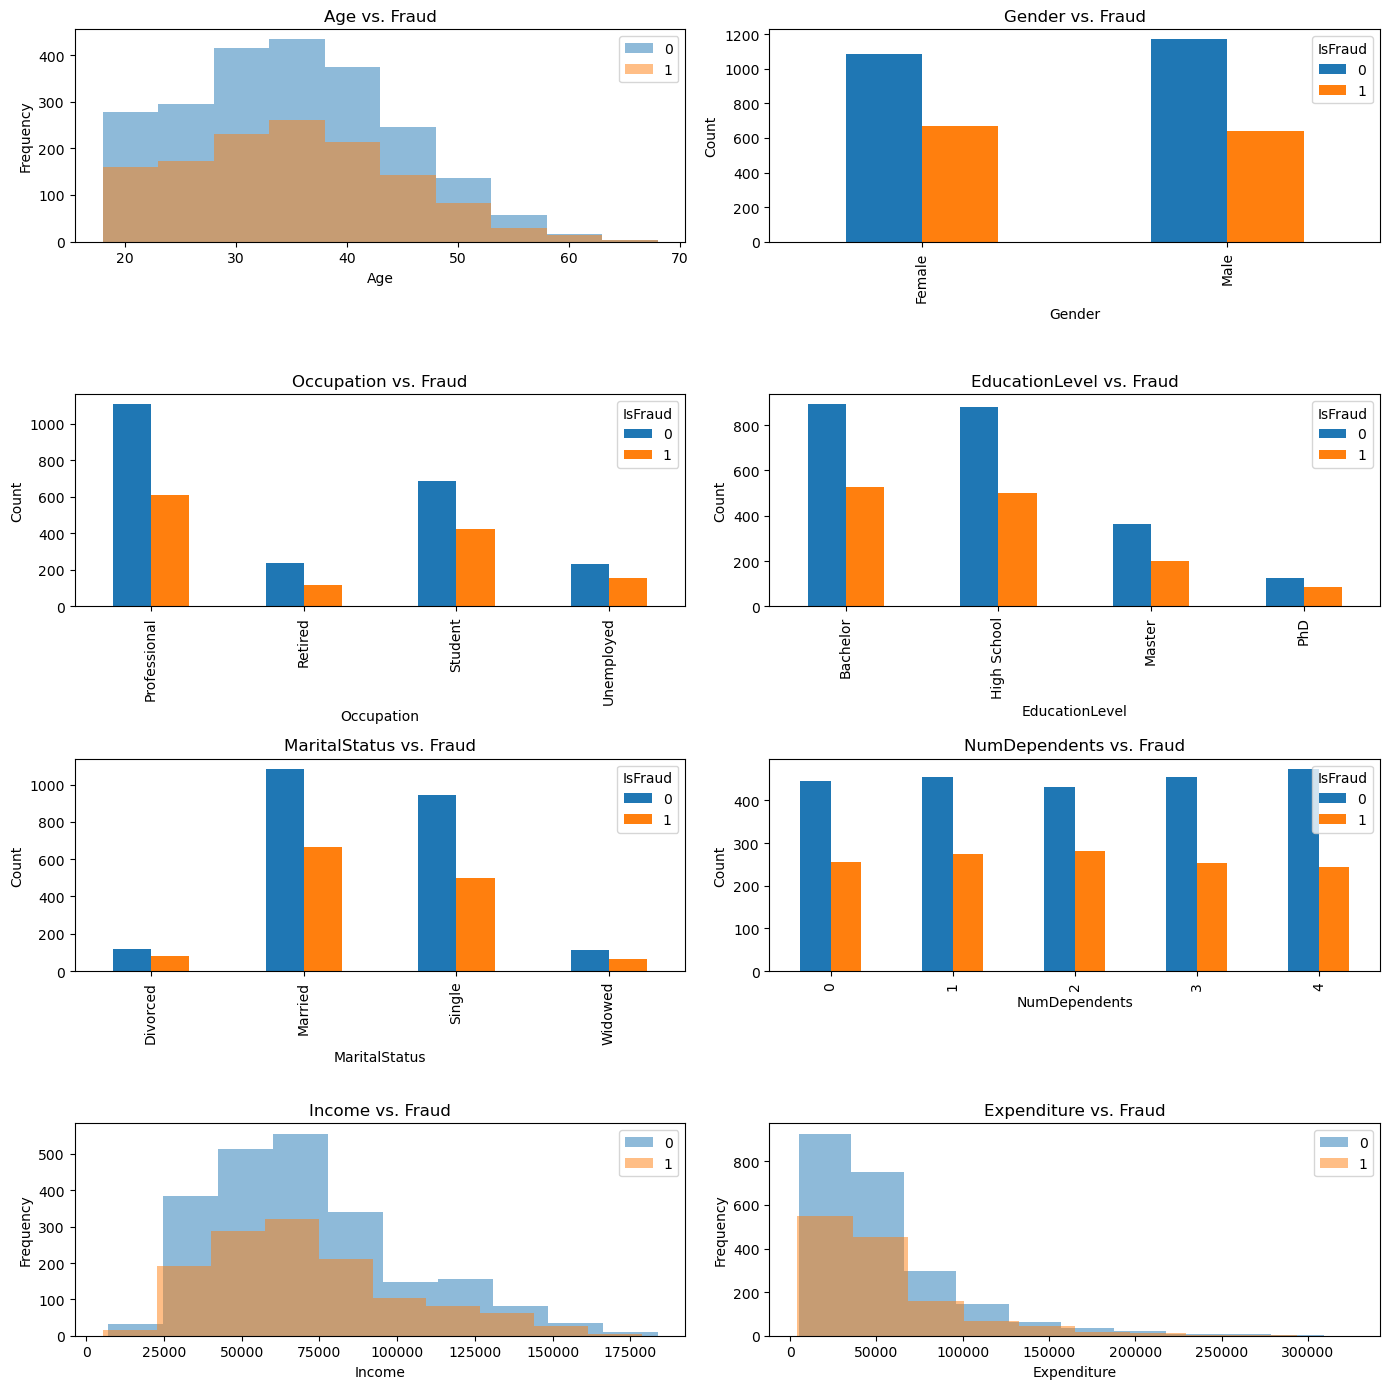

In [85]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 14))
axes = axes.flatten()  

for i, column in enumerate(demo):
    ax = axes[i]
    if column in df.columns:
        if df[column].dtype == 'object' or column == 'NumDependents': 
            df.groupby([column, 'IsFraud']).size().unstack().plot(kind='bar', ax=ax)
            ax.set_title(f'{column} vs. Fraud')
            ax.set_xlabel(column)
            ax.set_ylabel('Count')
        else: 
            print(column)
            df.groupby('IsFraud')[column].plot(kind='hist', ax=ax, alpha=0.5, legend=True)
            ax.set_title(f'{column} vs. Fraud')
            ax.set_xlabel(column)
            ax.set_ylabel('Frequency')
    else:
        ax.set_visible(False)  

plt.tight_layout()
plt.show()

In [64]:
trans = ['GiftsTransaction', 'TransactionAmount', 'MerchantID', 'TransactionType', 'TransactionLocation', 'DeviceType', 'Latitude', 'Longitude', 'Terrorism', 'UserTenure']

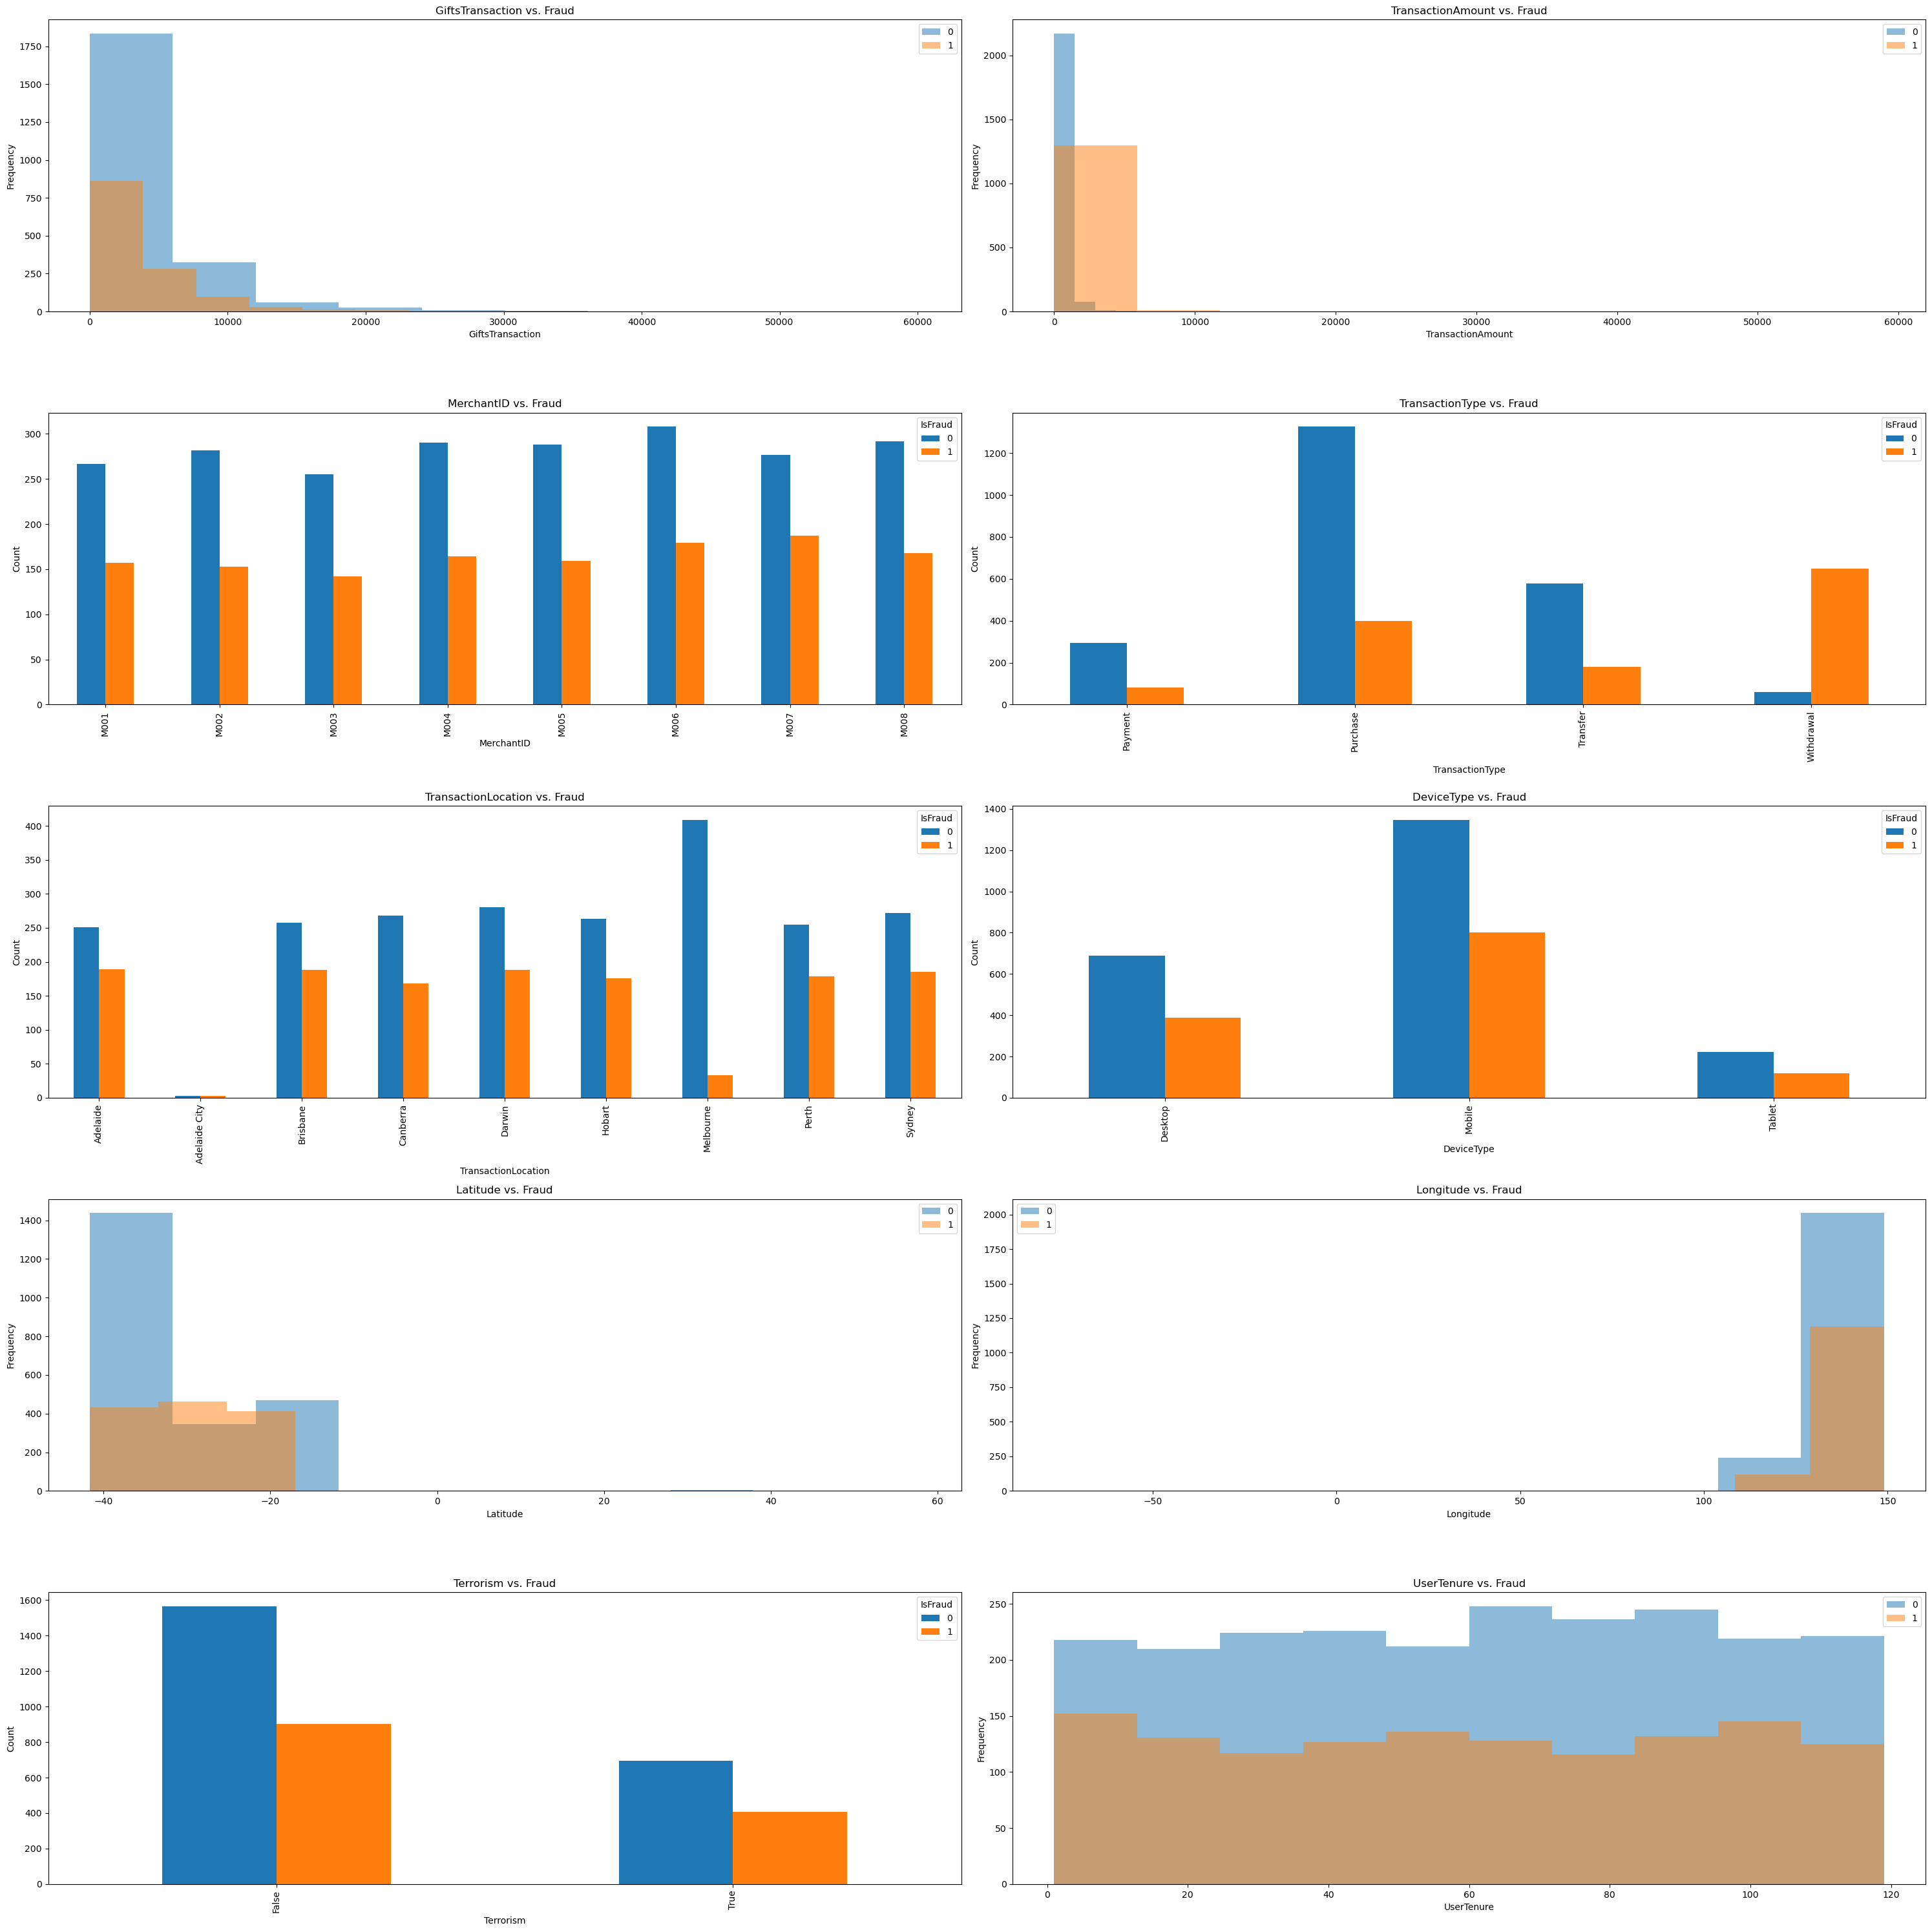

In [77]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))
axes = axes.flatten()  

for i, column in enumerate(trans):
    ax = axes[i]
    if column in df.columns:
        if df[column].dtype == 'object' or column == 'Terrorism': 
            df.groupby([column, 'IsFraud']).size().unstack().plot(kind='bar', ax=ax)
            ax.set_title(f'{column} vs. Fraud')
            ax.set_xlabel(column)
            ax.set_ylabel('Count')
        else: 
            df.groupby('IsFraud')[column].plot(kind='hist', ax=ax, alpha=0.5, legend=True)
            ax.set_title(f'{column} vs. Fraud')
            ax.set_xlabel(column)
            ax.set_ylabel('Frequency')
    else:
        ax.set_visible(False)  

plt.tight_layout()
plt.show()

In [78]:
transBox = ['GiftsTransaction', 'TransactionAmount', 'Latitude', 'Longitude', 'UserTenure']

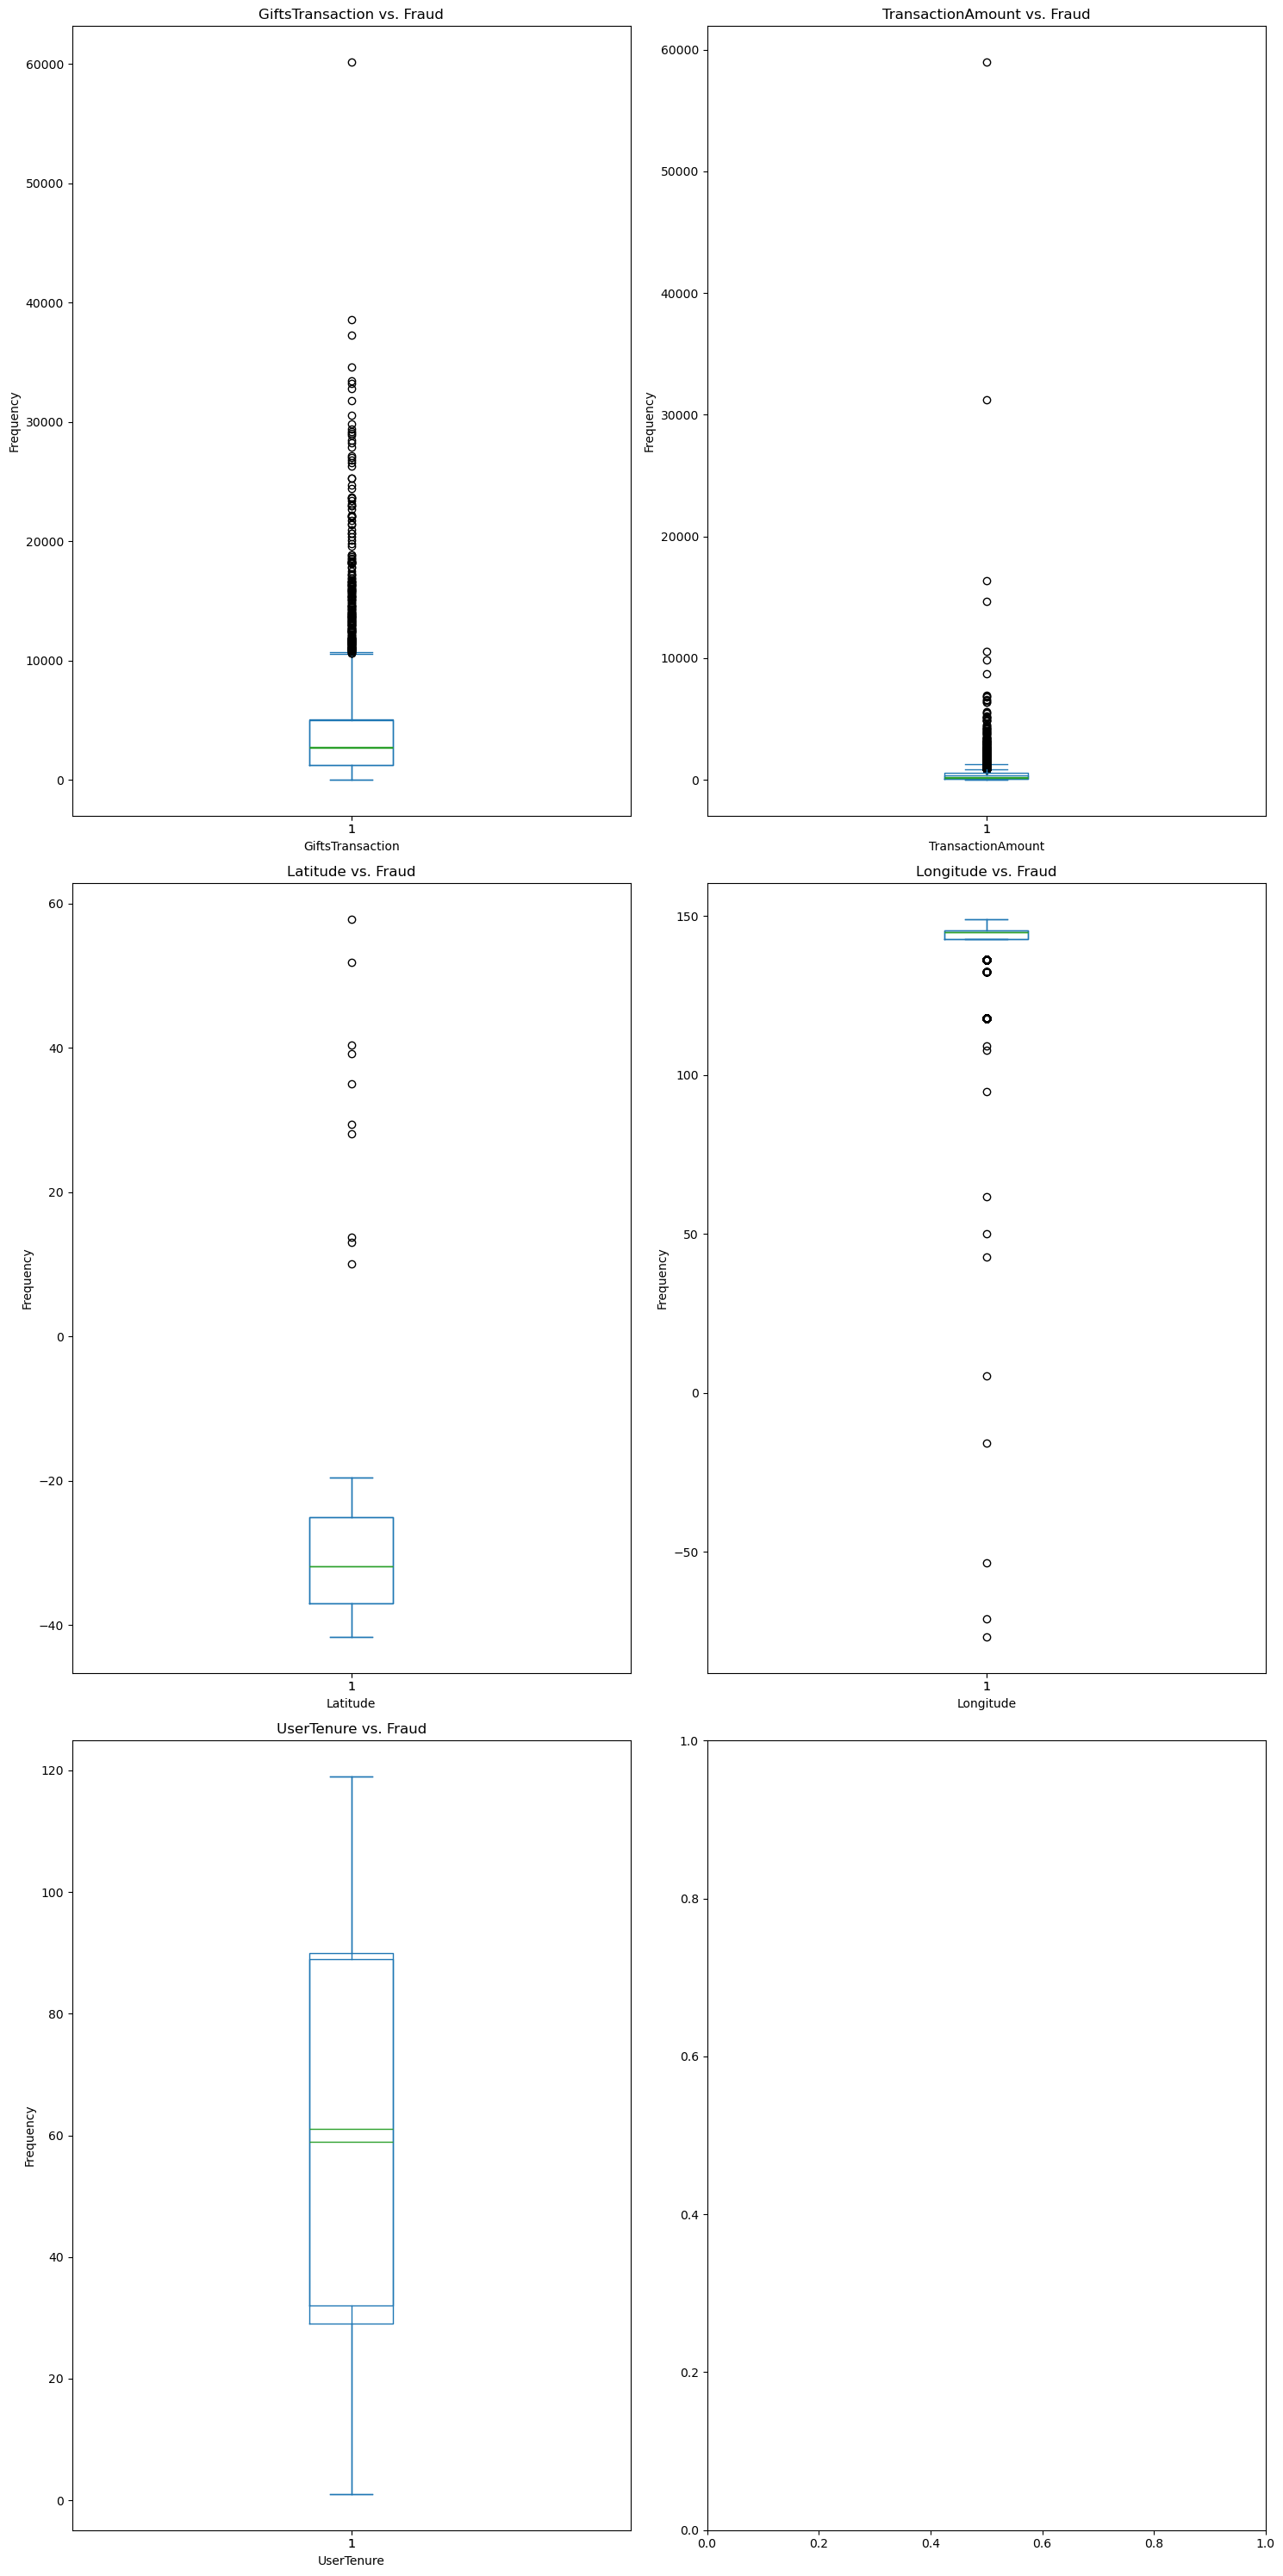

In [80]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 30))
axes = axes.flatten()  

for i, column in enumerate(transBox):
    ax = axes[i]
    if column in df.columns:
        df.groupby('IsFraud')[column].plot(kind='box', ax=ax, legend=True)
        ax.set_title(f'{column} vs. Fraud')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    else:
        ax.set_visible(False)  

plt.tight_layout()
plt.show()

In [86]:
demoBox = ['Age', 'Income', 'Expenditure']

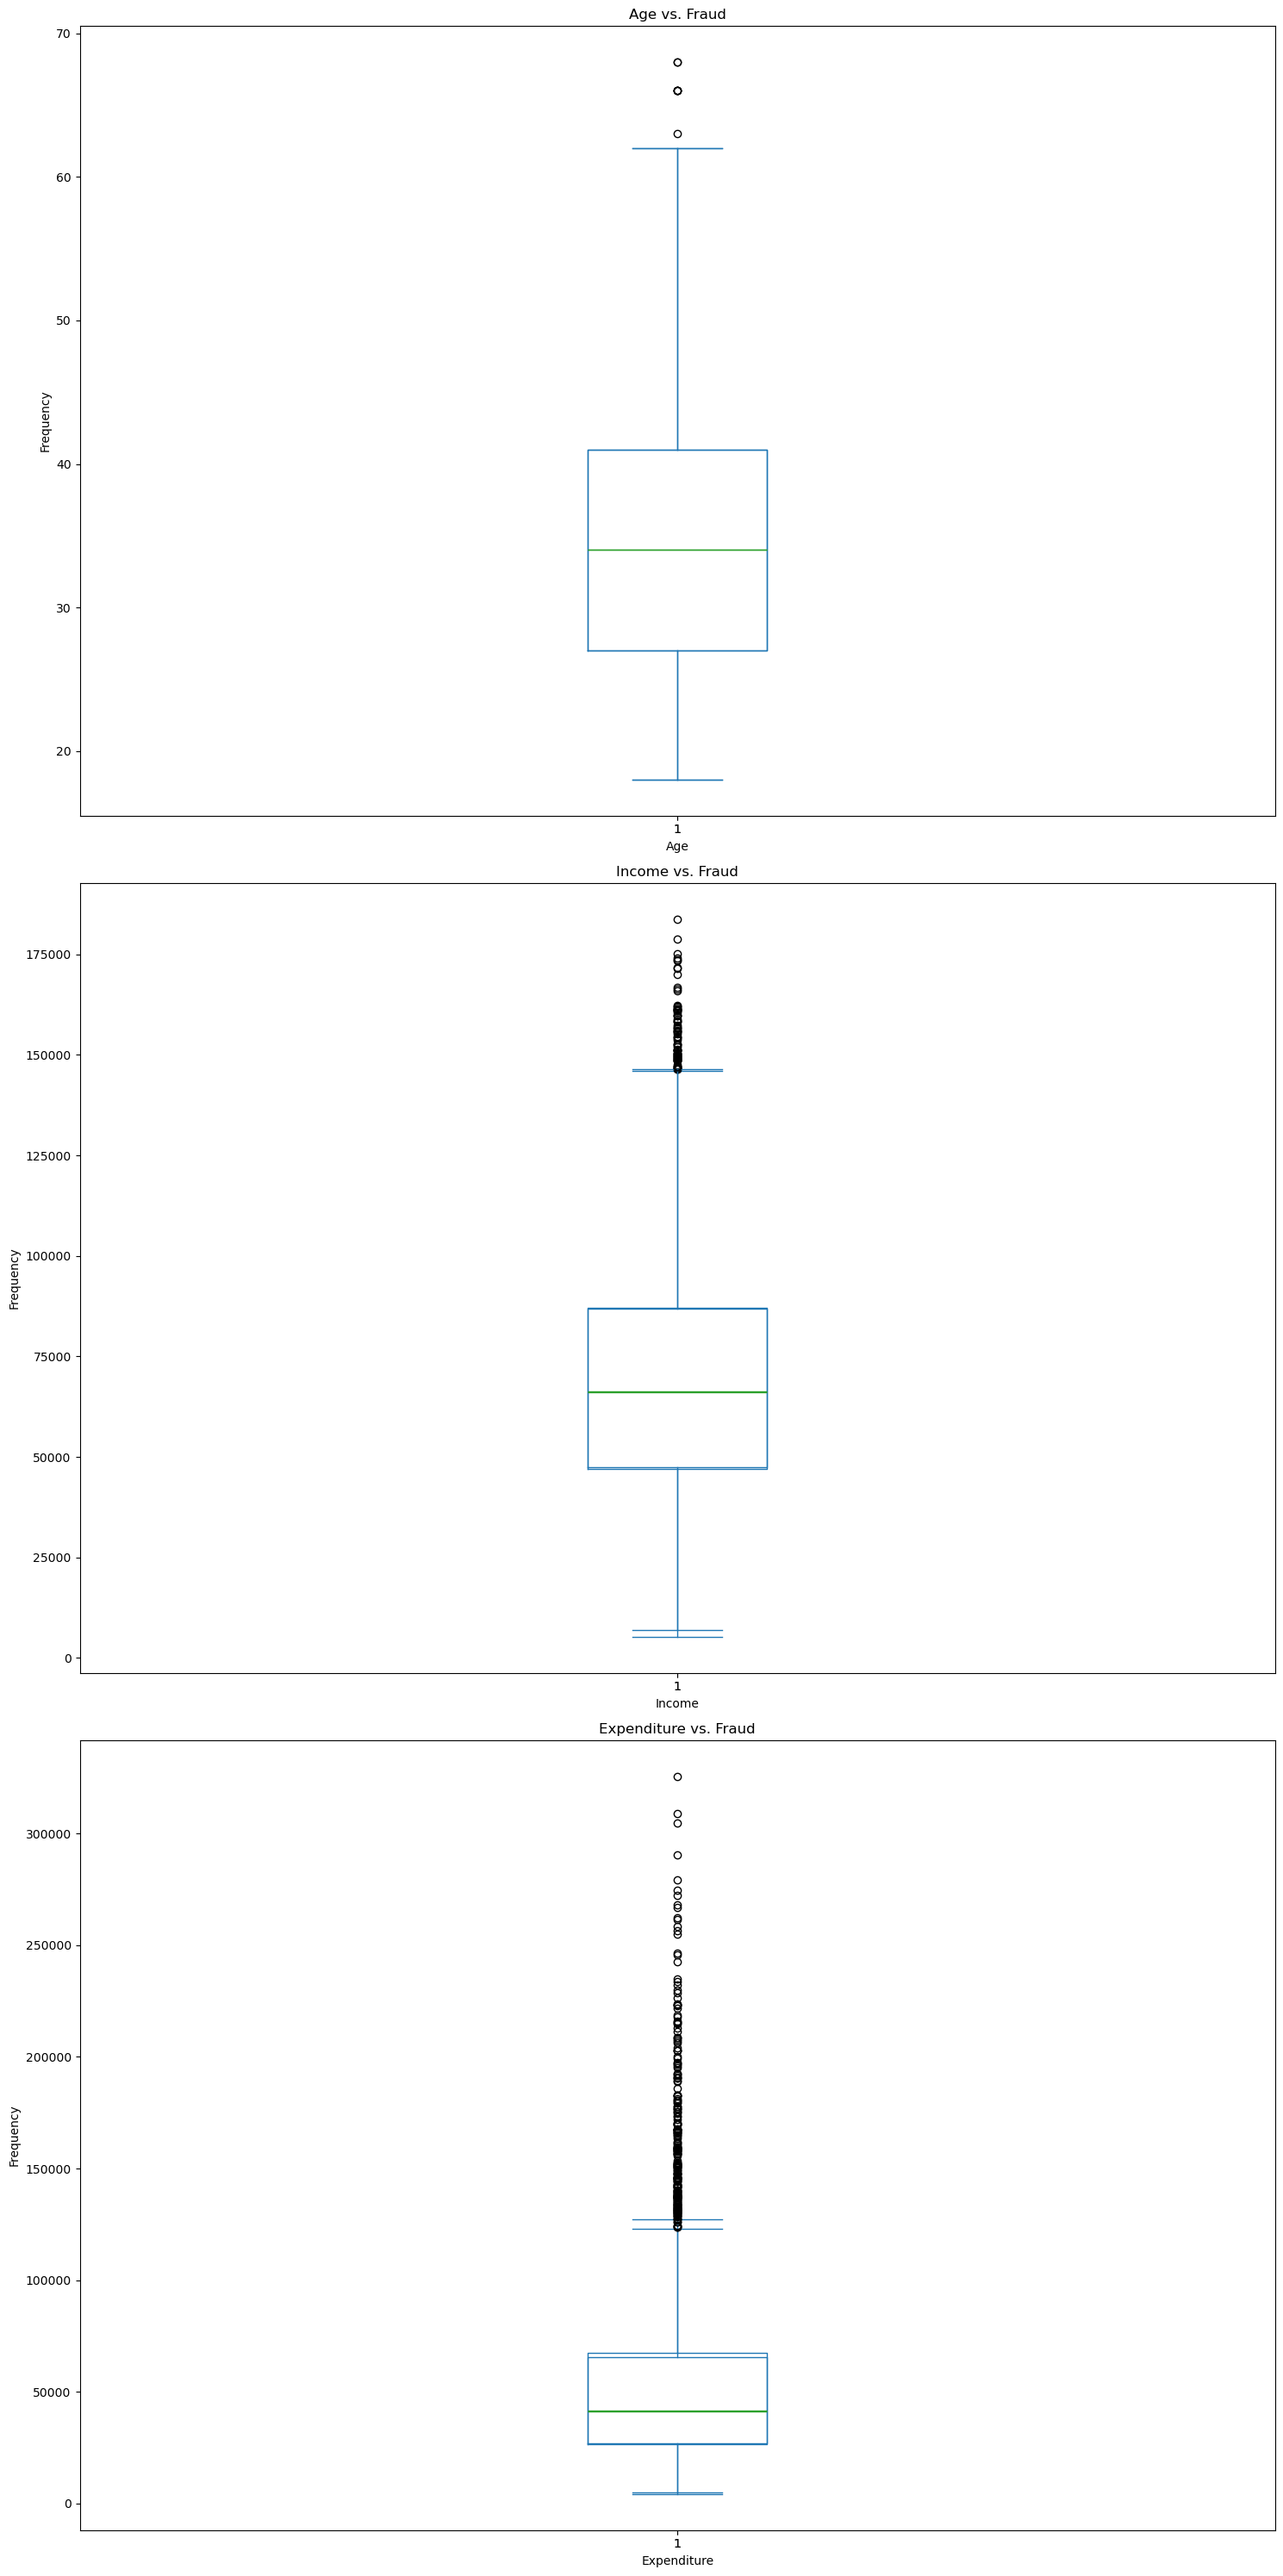

In [88]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 30))
axes = axes.flatten()  

for i, column in enumerate(demoBox):
    ax = axes[i]
    if column in df.columns:
        df.groupby('IsFraud')[column].plot(kind='box', ax=ax, legend=True)
        ax.set_title(f'{column} vs. Fraud')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    else:
        ax.set_visible(False)  

plt.tight_layout()
plt.show()